In [164]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
data=pd.read_csv('sonar.csv')
df=pd.DataFrame(data)
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [165]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [166]:
data.isnull().sum() #In the UCI description metioned as no null values, however cross checking.

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [167]:
data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [168]:
data.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

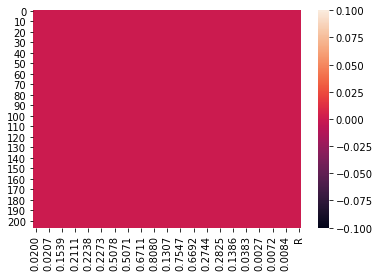

In [169]:
sns.heatmap(df.isnull())

In [170]:
df.skew()

0.0200    2.122983
0.0371    2.149965
0.0428    2.645849
0.0207    3.397590
0.0954    2.020369
0.0986    1.243828
0.1539    0.977346
0.1601    1.482755
0.3109    1.654558
0.2111    1.278532
0.1609    0.980388
0.1582    0.580918
0.2238    0.730580
0.0645    1.028081
0.0660    0.761921
0.2273    0.687003
0.3100    0.648143
0.2999    0.518349
0.5078    0.282680
0.4797   -0.089670
0.5783   -0.253902
0.5071   -0.398178
0.4328   -0.605569
0.5550   -0.698045
0.6711   -0.787297
0.6415   -0.673803
0.7104   -0.625869
0.8080   -0.608543
0.6791   -0.438803
0.3857   -0.142382
0.1307    0.265875
0.2604    0.304906
0.5121    0.429747
0.7547    0.576483
0.8537    0.602241
0.8507    0.631304
0.6692    0.691936
0.6097    1.051649
0.4943    0.920842
0.2744    0.856537
0.0510    0.866684
0.2834    0.858517
0.2825    0.911296
0.4256    1.258602
0.2641    1.371554
0.1386    1.700582
0.1051    1.783552
0.1343    1.287541
0.0383    1.266425
0.0324    1.776935
0.0232    2.724246
0.0027    2.098458
0.0065    1.

In [171]:
x=df.iloc[:,0:-1]
x.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [172]:
y=df.iloc[:,-1]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object

In [173]:
x.shape

(207, 60)

In [174]:
y.shape

(207,)

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=88)

In [176]:
x_train.shape

(138, 60)

In [177]:
y_train.shape

(138,)

In [178]:
x_test.shape

(69, 60)

In [179]:
y_test.shape

(69,)

In [180]:
lg=LogisticRegression()

In [181]:
lg.fit(x_train,y_train)

LogisticRegression()

In [182]:
pred=lg.predict(x_test)
print(pred)

['R' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M'
 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M'
 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R']


In [183]:
print("Accuracy_score:", accuracy_score(y_test,pred))

Accuracy_score: 0.8260869565217391


In [184]:
print(confusion_matrix(y_test,pred))

[[30  3]
 [ 9 27]]


In [185]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           M       0.77      0.91      0.83        33
           R       0.90      0.75      0.82        36

    accuracy                           0.83        69
   macro avg       0.83      0.83      0.83        69
weighted avg       0.84      0.83      0.83        69



In [187]:
#Saving the model

import joblib

#saving model as pickle in a file
joblib.dump(lg, 'sonar.pkl')

['sonar.pkl']